# Cifar10 - Animal Classification



# New Section

In [ ]:
import numpy as np
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping





In [ ]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()



In [ ]:
# Define the indices of the animal classes you want to keep
animal_classes = [3, 4, 5, 6, 7]  # cat, deer, dog, frog, horse



In [ ]:
# Filter the dataset to keep only the animal classes
train_filter = np.isin(y_train, animal_classes).reshape(-1)
test_filter = np.isin(y_test, animal_classes).reshape(-1)



In [ ]:
x_train = x_train[train_filter]
y_train = y_train[train_filter]
x_test = x_test[test_filter]
y_test = y_test[test_filter]



In [ ]:
# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0



In [ ]:
# Convert class vectors to binary class matrices
num_classes = len(animal_classes)
y_train = to_categorical(y_train - min(animal_classes), num_classes)
y_test = to_categorical(y_test - min(animal_classes), num_classes)



In [ ]:

# Build the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(len(animal_classes), activation='softmax'))

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])



In [ ]:

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3)


In [ ]:

# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model on the test set
# test_loss, test_acc = model.evaluate(x_test, y_test)
# print("Test accuracy:", test_acc)

Epoch 1/10
625/625 [==============================] - 6s 6ms/step - loss: 1.2399 - accuracy: 0.4741 - val_loss: 1.0626 - val_accuracy: 0.5770
Epoch 2/10
625/625 [==============================] - 3s 5ms/step - loss: 0.9803 - accuracy: 0.6123 - val_loss: 0.9451 - val_accuracy: 0.6268
Epoch 3/10
625/625 [==============================] - 3s 5ms/step - loss: 0.8814 - accuracy: 0.6564 - val_loss: 0.9068 - val_accuracy: 0.6446
Epoch 4/10
625/625 [==============================] - 4s 6ms/step - loss: 0.7989 - accuracy: 0.6899 - val_loss: 0.8021 - val_accuracy: 0.6922
Epoch 5/10
625/625 [==============================] - 3s 6ms/step - loss: 0.7299 - accuracy: 0.7185 - val_loss: 0.8277 - val_accuracy: 0.6840
Epoch 6/10
625/625 [==============================] - 3s 5ms/step - loss: 0.6729 - accuracy: 0.7409 - val_loss: 0.7717 - val_accuracy: 0.7000
Epoch 7/10
625/625 [==============================] - 3s 5ms/step - loss: 0.6217 - accuracy: 0.7611 - val_loss: 0.7990 - val_accuracy: 0.6986
Epoch 

In [ ]:
import random
import matplotlib.pyplot as plt



In [ ]:
# Define the class names
class_names = ['Cat', 'Deer', 'Dog', 'Frog', 'Horse']



In [ ]:
# Make predictions on the test set
predictions = model.predict(x_test)




157/157 [==============================] - 0s 2ms/step


In [ ]:
# Display some random images and their actual/predicted labels
num_samples = 5
random_indices = random.sample(range(len(x_test)), num_samples)


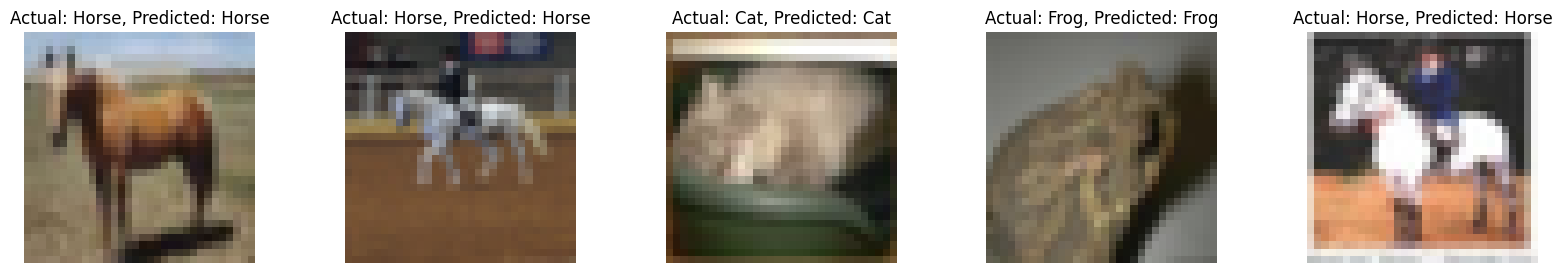

In [ ]:
# Create subplots
fig, axes = plt.subplots(1, num_samples, figsize=(20, 3))

for ax, i in zip(axes, random_indices):
    actual_label = np.argmax(y_test[i])
    predicted_label = np.argmax(predictions[i])

    actual_class_name = class_names[actual_label]
    predicted_class_name = class_names[predicted_label]

    ax.imshow(x_test[i], interpolation='nearest')  # Set interpolation to 'nearest'
    ax.set_title(f"Actual: {actual_class_name}, Predicted: {predicted_class_name}")
    ax.axis('off')  # Turn off axis labels for cleaner display

plt.show()

In [ ]:
import csv


In [ ]:
# Make predictions on the test set
predictions = model.predict(x_test)



157/157 [==============================] - 0s 2ms/step


In [ ]:
# Create a list to store results
results = []

# Iterate through test samples
for i in range(len(x_test)):
    actual_label = np.argmax(y_test[i])
    predicted_label = np.argmax(predictions[i])

    actual_class_name = class_names[actual_label]
    predicted_class_name = class_names[predicted_label]

    results.append({
        'ImageIndex': i,
        'ActualLabel': actual_class_name,
        'PredictedLabel': predicted_class_name
    })



In [ ]:
# Save results to a CSV file
csv_filename = 'test_results.csv'
fields = ['ImageIndex', 'ActualLabel', 'PredictedLabel']

with open(csv_filename, 'w', newline='') as csvfile:
    csvwriter = csv.DictWriter(csvfile, fieldnames=fields)

    # Write the header
    csvwriter.writeheader()

    # Write the results
    csvwriter.writerows(results)

print(f"Results saved to {csv_filename}")

Results saved to test_results.csv


In [ ]:
from PIL import Image
import numpy as np

# Load the new image
new_image_path = 'panda.jpeg'
new_image = Image.open(new_image_path)

# Preprocess the image
new_image = new_image.resize((32, 32))
new_image_array = np.array(new_image) / 255.0
new_image_array = np.expand_dims(new_image_array, axis=0)  # Add a batch dimension

# Make prediction using the trained model
prediction = model.predict(new_image_array)

# Get the predicted class index
predicted_class_index = np.argmax(prediction)

# Get the corresponding class name
predicted_class_name = class_names[predicted_class_index]

print(f"The predicted class is: {predicted_class_name}")


1/1 [==============================] - 0s 122ms/step
The predicted class is: Horse


In [ ]:
import csv

# Load the new image
new_image_path = 'panda.jpeg'
new_image = Image.open(new_image_path)

# Preprocess the image
new_image = new_image.resize((32, 32))
new_image_array = np.array(new_image) / 255.0
new_image_array = np.expand_dims(new_image_array, axis=0)  # Add a batch dimension

# Make prediction using the trained model
prediction = model.predict(new_image_array)

# Get the predicted class index
predicted_class_index = np.argmax(prediction)

# Get the corresponding class name
predicted_class_name = class_names[predicted_class_index]

# Print the predicted class
print(f"The predicted class is: {predicted_class_name}")

# Save the result in a CSV file
csv_file_path = 'path/to/your/output.csv'

with open(csv_file_path, 'w', newline='') as csv_file:
    fieldnames = ['Image Path', 'Predicted Class']
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)

    writer.writeheader()
    writer.writerow({'Image Path': new_image_path, 'Predicted Class': predicted_class_name})

print(f"Result saved to {csv_file_path}")


1/1 [==============================] - 0s 82ms/step
The predicted class is: Horse
Result saved to test_results2.csv
